In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras import layers
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Loading the dataset

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step



This converts the data types of x_train and x_test to float32, which uses 32 bits to store each floating-point number. Dividing by 255.0 normalizes the pixel values, typically in the range of 0 to 255, to a scale of 0 to 1. This normalization is often used in machine learning to improve model performance and convergence speed
```



In [ ]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [ ]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [ ]:
train_x, val_x, train_y, val_y = train_test_split(
    x_train, y_train, test_size=0.1, random_state=42)

In [ ]:
# convert class vectors to binary class matrices
train_y = to_categorical(train_y, num_classes=10)
val_y = to_categorical(val_y, num_classes=10)

We set all parameters to fixed values, and then proceed with parameter tuning. We chose 18 hyperparametwes to train our CNN model.

In [ ]:
#Training Hyperparameters
batch_size = 126
num_classes = 10
epochs = 50
learning_rates=0.0001
activation='relu'
Regularization = "l2"
Regularization_rate= 0.001
Optimizer="sgd"
dropout="t"
dropout_rate=0.5
dense_units= 128
lay_num=2
kernel_initializer ="he_normal"

#Hyperparameters
kernel_size = (3, 3)
pool_size=2
strides=1
conv_filters = [32, 64, 128, 215]
num_conv_layers = len(conv_filters)


# different convolutional layer configurations

We test different the number of convolutional layers and the number of filters in each layer and record the final training results for each configuration (accuracy and loss).

In [ ]:
# Define a list of different convolutional layer configurations to test
layer_configs = [
    [32, 64],
    [32, 64, 128],
    [32, 64, 128, 256],
    [32, 64, 128, 256, 512]
]
histories = []
for config in layer_configs:
    kernel_initializer = keras.initializers.get("glorot_uniform")
    if "kernel_initializer_type" in globals():
        kernel_initializer_type = kernel_initializer_type.lower()
        initializers = {
            "random_normal": keras.initializers.RandomNormal(),
            "glorot_normal": keras.initializers.GlorotNormal(),
            "he_normal": keras.initializers.HeNormal(),
            "glorot_uniform": keras.initializers.GlorotUniform(),
            "he_uniform": keras.initializers.HeUniform(),
            "random_uniform": keras.initializers.RandomUniform()
        }
        kernel_initializer = initializers.get(kernel_initializer_type, keras.initializers.GlorotUniform())

    kernel_regularizer = keras.regularizers.l2(0.001)
    model = keras.models.Sequential()
    input_shape = (28, 28, 1)
    model.add(layers.Input(shape=input_shape))
    for filters in config:
      model.add(layers.Conv2D(filters, kernel_size, activation=activation, padding="same", strides=strides, kernel_initializer=kernel_initializer))
      if model.output_shape[1] > 1 and model.output_shape[2] > 1:
          model.add(layers.MaxPooling2D(pool_size=pool_size))
    model.add(layers.Flatten())
    if dropout == "t":
        for _ in range(lay_num):
            model.add(layers.Dropout(dropout_rate))
            model.add(layers.Dense(dense_units, activation=activation, kernel_initializer=kernel_initializer, kernel_regularizer=kernel_regularizer))
    else:
        model.add(layers.Dense(dense_units, activation=activation, kernel_initializer=kernel_initializer, kernel_regularizer=kernel_regularizer))

    model.add(layers.Dense(10, activation="softmax"))
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(learning_rate=learning_rate),
                  metrics=['accuracy'])
    history = model.fit(train_x, train_y,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=1,
                        validation_data=(val_x, val_y))

    histories.append((config, history))
results = {
    "layer_configuration": [],
    "epoch": [],
    "accuracy": [],
    "loss": []
}

for config, history in histories:
    final_epoch = len(history.history['accuracy'])
    final_accuracy = history.history['accuracy'][-1]
    final_loss = history.history['loss'][-1]
    results["layer_configuration"].append(str(config))
    results["epoch"].append(final_epoch)
    results["accuracy"].append(final_accuracy)
    results["loss"].append(final_loss)

df = pd.DataFrame(results)
csv_file = 'different_layer_configurations.csv'

if os.path.exists(csv_file):
    df.to_csv(csv_file, mode='a', header=False, index=False)
else:
    df.to_csv(csv_file, mode='w', header=True, index=False)


Epoch 1/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.1042 - loss: 2.6483 - val_accuracy: 0.1962 - val_loss: 2.6399
Epoch 2/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1507 - loss: 2.6378 - val_accuracy: 0.2132 - val_loss: 2.6198
Epoch 3/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1710 - loss: 2.6122 - val_accuracy: 0.2597 - val_loss: 2.4751
Epoch 4/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2865 - loss: 2.3324 - val_accuracy: 0.5977 - val_loss: 1.5583
Epoch 5/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.4569 - loss: 1.6835 - val_accuracy: 0.5820 - val_loss: 1.3669
Epoch 6/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5123 - loss: 1.5267 - val_accuracy: 0.5893 - val_loss: 1.3011
Epoch 7/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5406 - loss: 1.4500 - val_accuracy: 0.6017 - val_loss: 1.2588
Epoch 8/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5598 - loss: 1.4046 - val_accuracy: 

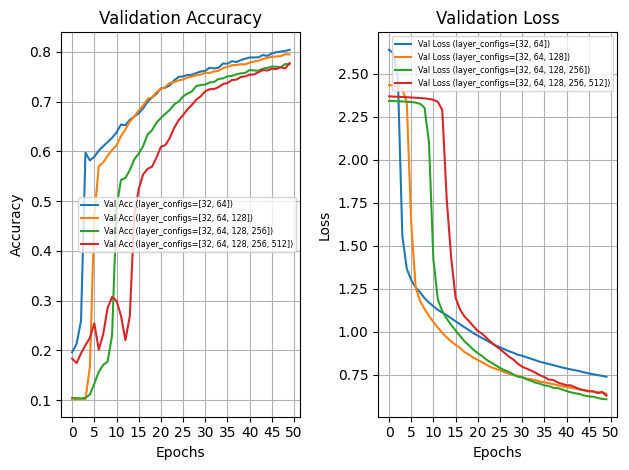

In [ ]:
import matplotlib.pyplot as plt

def plot_metrics(histories, epochs):
    plt.subplot(1, 2, 1)
    for lr, history in histories:
        plt.plot(history.history['val_accuracy'], label=f'Val Acc (layer_configs={lr})')
    plt.title('Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.xticks(range(0, epochs + 1, 5))
    plt.legend(fontsize='xx-small')
    plt.grid()
    plt.subplot(1, 2, 2)
    for lr, history in histories:
        plt.plot(history.history['val_loss'], label=f'Val Loss (layer_configs={lr})')
    plt.title('Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.xticks(range(0, epochs + 1, 5))
    plt.legend(fontsize='xx-small')
    plt.grid()
    plt.tight_layout()
    plt.show()
plot_metrics(histories, epochs)



# Different learning_rate
We set different learning_rate like 0.001,0.0001, 0.00001 etc that are common in deep learning and we fix other parameters. As a result, we will find best learning_rate to fit CNN model.

In [ ]:

learning_rates = [0.001, 0.1, 0.0001, 0.00001, 0.01]
histories = []
for learning_rate in learning_rates:

    if kernel_initializer == "random_normal":
        kernel_initializer = keras.initializers.RandomNormal()
    elif kernel_initializer == "glorot_normal":
        kernel_initializer = keras.initializers.GlorotNormal()
    elif kernel_initializer == "he_normal":
        kernel_initializer = keras.initializers.HeNormal()
    elif kernel_initializer == "glorot_uniform":
        kernel_initializer = keras.initializers.GlorotUniform()
    elif kernel_initializer == "he_uniform":
        kernel_initializer = keras.initializers.HeUniform()
    elif kernel_initializer == "random_uniform":
        kernel_initializer = keras.initializers.RandomUniform()
    else:
        kernel_initializer = keras.initializers.GlorotUniform()

    if Regularization == "l1":
        kernel_regularizer = keras.regularizers.l1(dropout_rate)
    elif Regularization == "l2":
        kernel_regularizer = keras.regularizers.l2(dropout_rate)
    elif Regularization == "l1_l2":
        kernel_regularizer = keras.regularizers.l1_l2(l1=dropout_rate, l2=dropout_rate)
    else:
        kernel_regularizer = None

    model = keras.models.Sequential()
    input_shape = (28, 28, 1)
    model.add(layers.Input(shape=input_shape))
    model.add(layers.Conv2D(conv_filters[0], kernel_size, activation=activation, padding="same", strides=strides, kernel_initializer=kernel_initializer))
    model.add(layers.MaxPooling2D(pool_size=pool_size))

    for i in range(1, num_conv_layers):
        model.add(layers.Conv2D(conv_filters[i], kernel_size, activation=activation, padding="same", strides=strides, kernel_initializer=kernel_initializer))
        model.add(layers.MaxPooling2D(pool_size=pool_size))

    model.add(layers.Flatten())
    if dropout == "t":
        for _ in range(lay_num):
            model.add(layers.Dropout(dropout_rate))
            model.add(layers.Dense(dense_units, activation=activation, kernel_initializer=kernel_initializer, kernel_regularizer=kernel_regularizer))
    else:
        model.add(layers.Dense(dense_units, activation=activation, kernel_initializer=kernel_initializer, kernel_regularizer=kernel_regularizer))

    model.add(layers.Dense(10, activation="softmax"))
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(learning_rate=learning_rate),
                  metrics=['accuracy'])
    history = model.fit(train_x, train_y,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=1,
                        validation_data=(val_x, val_y))
    histories.append((learning_rate, history))

Epoch 1/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.1039 - loss: 143.1586 - val_accuracy: 0.1350 - val_loss: 133.4066
Epoch 2/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.1207 - loss: 129.3685 - val_accuracy: 0.1300 - val_loss: 116.4900
Epoch 3/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1319 - loss: 111.9523 - val_accuracy: 0.1552 - val_loss: 98.2118
Epoch 4/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1381 - loss: 93.6769 - val_accuracy: 0.2022 - val_loss: 80.3178
Epoch 5/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1439 - loss: 76.0826 - val_accuracy: 0.2565 - val_loss: 63.8401
Epoch 6/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1445 - loss: 60.0747 - val_accuracy: 0.2428 - val_loss: 49.3534
Epoch 7/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.1462 - loss: 46.1404 - val_accuracy: 0.2292 - val_loss: 37.1136
Epoch 8/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.

This is a plot comparing different learning rates, with epochs on the x-axis and loss and accuracy on the y-axis.

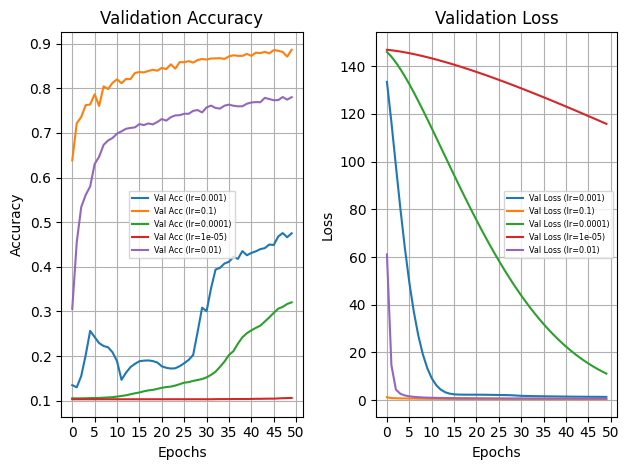

In [ ]:
import matplotlib.pyplot as plt
def plot_metrics(histories, epochs):
    plt.subplot(1, 2, 1)
    for lr, history in histories:
        plt.plot(history.history['val_accuracy'], label=f'Val Acc (lr={lr})')
    plt.title('Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.xticks(range(0, epochs + 1, 5))
    plt.legend(fontsize='xx-small')
    plt.grid()

    plt.subplot(1, 2, 2)
    for lr, history in histories:
        plt.plot(history.history['val_loss'], label=f'Val Loss (lr={lr})')
    plt.title('Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.xticks(range(0, epochs + 1, 5))
    plt.legend(fontsize='xx-small')
    plt.grid()

    plt.tight_layout()
    plt.show()
plot_metrics(histories, epochs)

#different initializer
We defined initializertypes to test and store values in inialize list.This code compares different weight initializers in CNN training by evaluating each initializer’s impact on the final epoch’s accuracy and loss. The results are saved to a CSV file, allowing for easy comparison and helping to identify the best initialization method for the model.



In [ ]:

kernel_initializer_types = ["random_normal", "glorot_normal", "he_normal", "glorot_uniform", "he_uniform", "random_uniform"]
histories = []
for kernel_initializer_type in kernel_initializer_types:
    if kernel_initializer_type == "random_normal":
        kernel_initializer = keras.initializers.RandomNormal()
    elif kernel_initializer_type == "glorot_normal":
        kernel_initializer = keras.initializers.GlorotNormal()
    elif kernel_initializer_type == "he_normal":
        kernel_initializer = keras.initializers.HeNormal()
    elif kernel_initializer_type == "glorot_uniform":
        kernel_initializer = keras.initializers.GlorotUniform()
    elif kernel_initializer_type == "he_uniform":
        kernel_initializer = keras.initializers.HeUniform()
    elif kernel_initializer_type == "random_uniform":
        kernel_initializer = keras.initializers.RandomUniform()
    else:
        kernel_initializer = keras.initializers.GlorotUniform()
    if Regularization == "l1":
        kernel_regularizer = keras.regularizers.l1(dropout_rate)
    elif Regularization == "l2":
        kernel_regularizer = keras.regularizers.l2(dropout_rate)
    elif Regularization == "l1_l2":
        kernel_regularizer = keras.regularizers.l1_l2(l1=dropout_rate, l2=dropout_rate)
    else:
        kernel_regularizer = None
    model = keras.models.Sequential()
    input_shape = (28, 28, 1)
    model.add(layers.Input(shape=input_shape))
    model.add(layers.Conv2D(conv_filters[0], kernel_size, activation=activation, padding="same", strides=strides, kernel_initializer=kernel_initializer))
    model.add(layers.MaxPooling2D(pool_size=pool_size))

    for i in range(1, num_conv_layers):
        model.add(layers.Conv2D(conv_filters[i], kernel_size, activation=activation, padding="same", strides=strides, kernel_initializer=kernel_initializer))
        model.add(layers.MaxPooling2D(pool_size=pool_size))

    model.add(layers.Flatten())
    if dropout == "t":
        for _ in range(lay_num):
            model.add(layers.Dropout(dropout_rate))
            model.add(layers.Dense(dense_units, activation=activation, kernel_initializer=kernel_initializer, kernel_regularizer=kernel_regularizer))
    else:
        model.add(layers.Dense(dense_units, activation=activation, kernel_initializer=kernel_initializer, kernel_regularizer=kernel_regularizer))

    model.add(layers.Dense(10, activation="softmax"))

    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(learning_rate=learning_rates),
                  metrics=['accuracy'])
    history = model.fit(train_x, train_y,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=1,
                        validation_data=(val_x, val_y))

    histories.append((kernel_initializer_type, history))

results = {
    "initializer": [],
    "epoch": [],
    "accuracy": [],
    "loss": []
}

for initializer, history in histories:
    final_epoch = len(history.history['accuracy'])
    final_accuracy = history.history['accuracy'][-1]
    final_loss = history.history['loss'][-1]
    results["initializer"].append(initializer)
    results["epoch"].append(final_epoch)
    results["accuracy"].append(final_accuracy)
    results["loss"].append(final_loss)
df = pd.DataFrame(results)
csv_file = 'training_results_last_epoch.csv'
if os.path.exists(csv_file):
    df.to_csv(csv_file, mode='a', header=False, index=False)
else:
    df.to_csv(csv_file, mode='w', header=True, index=False)


Epoch 1/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - accuracy: 0.0998 - loss: 57.1075 - val_accuracy: 0.1018 - val_loss: 56.0732
Epoch 2/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1012 - loss: 55.6760 - val_accuracy: 0.1018 - val_loss: 54.4076
Epoch 3/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1055 - loss: 53.9491 - val_accuracy: 0.1018 - val_loss: 52.5189
Epoch 4/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1076 - loss: 52.0170 - val_accuracy: 0.1018 - val_loss: 50.4740
Epoch 5/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1072 - loss: 49.9427 - val_accuracy: 0.1018 - val_loss: 48.3231
Epoch 6/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1077 - loss: 47.7729 - val_accuracy: 0.1018 - val_loss: 46.1056
Epoch 7/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.1109 - loss: 45.5445 - val_accuracy: 0.1020 - val_loss: 43.8534
Epoch 8/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.1115 - loss: 43.2885 -

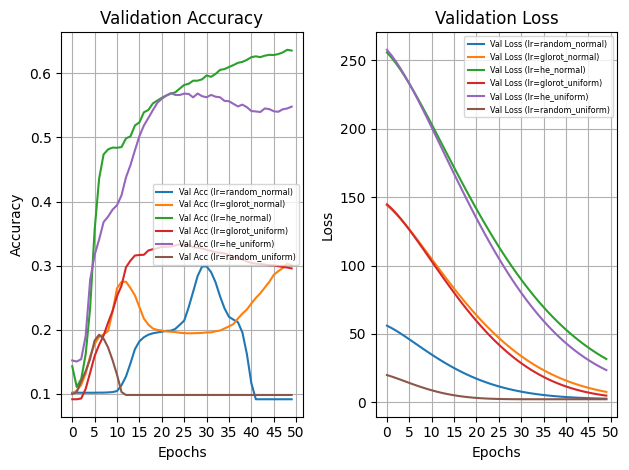

In [ ]:
import matplotlib.pyplot as plt
def plot_metrics(histories, epochs):
    plt.subplot(1, 2, 1)
    for lr, history in histories:
        plt.plot(history.history['val_accuracy'], label=f'Val Acc (lr={lr})')
    plt.title('Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.xticks(range(0, epochs + 1, 5))
    plt.legend(fontsize='xx-small')
    plt.grid()

    plt.subplot(1, 2, 2)
    for lr, history in histories:
        plt.plot(history.history['val_loss'], label=f'Val Loss (lr={lr})')
    plt.title('Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.xticks(range(0, epochs + 1, 5))
    plt.legend(fontsize='xx-small')
    plt.grid()

    plt.tight_layout()
    plt.show()
plot_metrics(histories, epochs)

# different regularization
This code helps evaluate the impact of different regularization methods on CNN performance. By testing each configuration, it records the final epoch’s accuracy and loss and saves these results to a CSV file. This allows for a comparison of regularization techniques and aids in selecting the most effective method for reducing overfitting while maintaining model accuracy.

In [ ]:
regularization_types = ["l1", "l2", "l1_l2"]
epochs = 50
learning_rate=0.0001
histories = []
for regularization in regularization_types:
    if kernel_initializer == "random_normal":
        kernel_initializer = keras.initializers.RandomNormal()
    elif kernel_initializer == "glorot_normal":
        kernel_initializer = keras.initializers.GlorotNormal()
    elif kernel_initializer == "he_normal":
        kernel_initializer = keras.initializers.HeNormal()
    elif kernel_initializer == "glorot_uniform":
        kernel_initializer = keras.initializers.GlorotUniform()
    elif kernel_initializer == "he_uniform":
        kernel_initializer = keras.initializers.HeUniform()
    elif kernel_initializer == "random_uniform":
        kernel_initializer = keras.initializers.RandomUniform()
    else:
        kernel_initializer = keras.initializers.GlorotUniform()

    if regularization == "l1":
        kernel_regularizer = keras.regularizers.l1(dropout_rate)
    elif regularization == "l2":
        kernel_regularizer = keras.regularizers.l2(dropout_rate)
    elif regularization == "l1_l2":
        kernel_regularizer = keras.regularizers.l1_l2(l1=dropout_rate, l2=dropout_rate)
    else:
        kernel_regularizer = None

    model = keras.models.Sequential()
    input_shape = (28, 28, 1)
    model.add(layers.Input(shape=input_shape))

    model.add(layers.Conv2D(conv_filters[0], kernel_size, activation=activation, padding="same", strides=strides, kernel_initializer=kernel_initializer))
    model.add(layers.MaxPooling2D(pool_size=pool_size))

    for i in range(1, num_conv_layers):
        model.add(layers.Conv2D(conv_filters[i], kernel_size, activation=activation, padding="same", strides=strides, kernel_initializer=kernel_initializer))
        model.add(layers.MaxPooling2D(pool_size=pool_size))

    model.add(layers.Flatten())
    if dropout == "t":
        for _ in range(lay_num):
            model.add(layers.Dropout(dropout_rate))
            model.add(layers.Dense(dense_units, activation=activation, kernel_initializer=kernel_initializer, kernel_regularizer=kernel_regularizer))
    else:
        model.add(layers.Dense(dense_units, activation=activation, kernel_initializer=kernel_initializer, kernel_regularizer=kernel_regularizer))

    model.add(layers.Dense(10, activation="softmax"))

    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(learning_rate=learning_rates),
                  metrics=['accuracy'])
    history = model.fit(train_x, train_y,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=1,
                        validation_data=(val_x, val_y))

    histories.append((regularization, history))
results = {
    "regularization": [],
    "epoch": [],
    "accuracy": [],
    "loss": []
}
for regularization, history in histories:
    final_epoch = len(history.history['accuracy'])
    final_accuracy = history.history['accuracy'][-1]
    final_loss = history.history['loss'][-1]
    results["regularization"].append(regularization)
    results["epoch"].append(final_epoch)
    results["accuracy"].append(final_accuracy)
    results["loss"].append(final_loss)

df = pd.DataFrame(results)
csv_file = 'different_dropout.csv'
if os.path.exists(csv_file):
    df.to_csv(csv_file, mode='a', header=False, index=False)
else:
    df.to_csv(csv_file, mode='w', header=True, index=False)


Epoch 1/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.1040 - loss: 1526.0508 - val_accuracy: 0.1013 - val_loss: 1512.8850
Epoch 2/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1076 - loss: 1507.7300 - val_accuracy: 0.1013 - val_loss: 1491.1072
Epoch 3/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.1135 - loss: 1484.9685 - val_accuracy: 0.1013 - val_loss: 1465.5948
Epoch 4/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1153 - loss: 1458.6373 - val_accuracy: 0.1013 - val_loss: 1436.9580
Epoch 5/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1216 - loss: 1429.3075 - val_accuracy: 0.1015 - val_loss: 1405.6556
Epoch 6/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1260 - loss: 1397.4045 - val_accuracy: 0.1030 - val_loss: 1372.0487
Epoch 7/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1301 - loss: 1363.2822 - val_accuracy: 0.1143 - val_loss: 1336.4501
Epoch 8/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accura

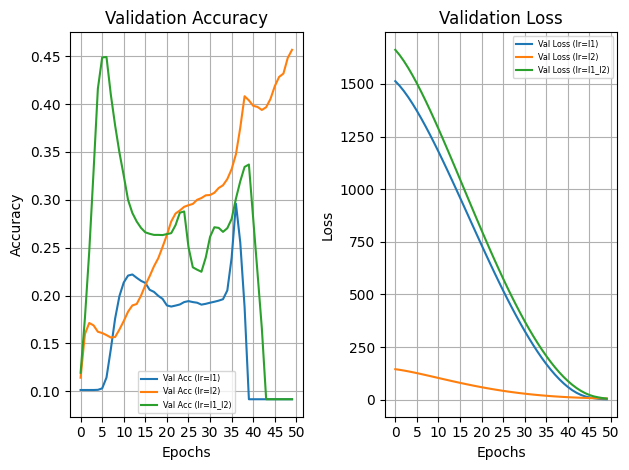

In [ ]:
import matplotlib.pyplot as plt
def plot_metrics(histories, epochs):
    plt.subplot(1, 2, 1)
    for lr, history in histories:
        plt.plot(history.history['val_accuracy'], label=f'Val Acc (lr={lr})')
    plt.title('Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.xticks(range(0, epochs + 1, 5))
    plt.legend(fontsize='xx-small')
    plt.grid()

    plt.subplot(1, 2, 2)
    for lr, history in histories:
        plt.plot(history.history['val_loss'], label=f'Val Loss (lr={lr})')
    plt.title('Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.xticks(range(0, epochs + 1, 5))
    plt.legend(fontsize='xx-small')
    plt.grid()

    plt.tight_layout()
    plt.show()
plot_metrics(histories, epochs)

# different  regularization rate

This code evaluates the effect of different L2 regularization rates on CNN performance by testing each configuration and recording the final epoch’s accuracy and loss. Saving these results to a CSV file enables easy comparison of model performance across regularization rates, helping to identify the most effective rate for balancing model generalization and accuracy


In [ ]:

regularization_rates = [0.0001, 0.001, 0.01, 0.1, 0.5]
histories = []
for reg_rate in regularization_rates:
    if kernel_initializer == "random_normal":
        kernel_initializer = keras.initializers.RandomNormal()
    elif kernel_initializer == "glorot_normal":
        kernel_initializer = keras.initializers.GlorotNormal()
    elif kernel_initializer == "he_normal":
        kernel_initializer = keras.initializers.HeNormal()
    elif kernel_initializer == "glorot_uniform":
        kernel_initializer = keras.initializers.GlorotUniform()
    elif kernel_initializer == "he_uniform":
        kernel_initializer = keras.initializers.HeUniform()
    elif kernel_initializer == "random_uniform":
        kernel_initializer = keras.initializers.RandomUniform()
    else:
        kernel_initializer = keras.initializers.GlorotUniform()
    kernel_regularizer = keras.regularizers.l2(reg_rate)
    model = keras.models.Sequential()
    input_shape = (28, 28, 1)
    model.add(layers.Input(shape=input_shape))
    model.add(layers.Conv2D(conv_filters[0], kernel_size, activation=activation, padding="same", strides=strides, kernel_initializer=kernel_initializer))
    model.add(layers.MaxPooling2D(pool_size=pool_size))

    for i in range(1, num_conv_layers):
        model.add(layers.Conv2D(conv_filters[i], kernel_size, activation=activation, padding="same", strides=strides, kernel_initializer=kernel_initializer))
        model.add(layers.MaxPooling2D(pool_size=pool_size))

    model.add(layers.Flatten())
    if dropout == "t":
        for _ in range(lay_num):
            model.add(layers.Dropout(dropout_rate))
            model.add(layers.Dense(dense_units, activation=activation, kernel_initializer=kernel_initializer, kernel_regularizer=kernel_regularizer))
    else:
        model.add(layers.Dense(dense_units, activation=activation, kernel_initializer=kernel_initializer, kernel_regularizer=kernel_regularizer))

    model.add(layers.Dense(10, activation="softmax"))

    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(learning_rate=learning_rates),
                  metrics=['accuracy'])
    history = model.fit(train_x, train_y,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=1,
                        validation_data=(val_x, val_y))

    histories.append((reg_rate, history))
results = {
    "regularization_rate": [],
    "epoch": [],
    "accuracy": [],
    "loss": []
}
for reg_rate, history in histories:
    final_epoch = len(history.history['accuracy'])
    final_accuracy = history.history['accuracy'][-1]
    final_loss = history.history['loss'][-1]
    results["regularization_rate"].append(reg_rate)
    results["epoch"].append(final_epoch)
    results["accuracy"].append(final_accuracy)
    results["loss"].append(final_loss)

df = pd.DataFrame(results)
csv_file = 'different_regularization_rates.csv'

if os.path.exists(csv_file):
    df.to_csv(csv_file, mode='a', header=False, index=False)
else:
    df.to_csv(csv_file, mode='w', header=True, index=False)


Epoch 1/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.0988 - loss: 5.4704 - val_accuracy: 0.0992 - val_loss: 3.5587
Epoch 2/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.0991 - loss: 5.2356 - val_accuracy: 0.1007 - val_loss: 3.3697
Epoch 3/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.0974 - loss: 4.9796 - val_accuracy: 0.1012 - val_loss: 3.1958
Epoch 4/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.0975 - loss: 4.7743 - val_accuracy: 0.1015 - val_loss: 3.0394
Epoch 5/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1018 - loss: 4.5446 - val_accuracy: 0.1022 - val_loss: 2.9023
Epoch 6/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.0992 - loss: 4.3677 - val_accuracy: 0.1027 - val_loss: 2.7824
Epoch 7/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1014 - loss: 4.1948 - val_accuracy: 0.1027 - val_loss: 2.6811
Epoch 8/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1022 - loss: 4.0624 - val_accuracy: 

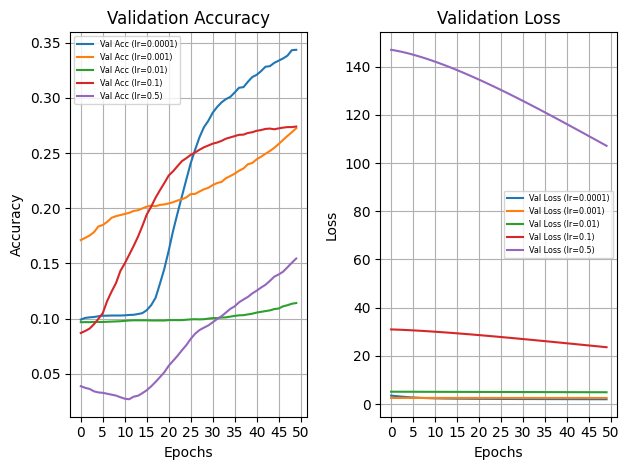

In [ ]:
import matplotlib.pyplot as plt
def plot_metrics(histories, epochs):
    plt.subplot(1, 2, 1)
    for lr, history in histories:
        plt.plot(history.history['val_accuracy'], label=f'Val Acc (lr={lr})')
    plt.title('Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.xticks(range(0, epochs + 1, 5))
    plt.legend(fontsize='xx-small')
    plt.grid()

    plt.subplot(1, 2, 2)
    for lr, history in histories:
        plt.plot(history.history['val_loss'], label=f'Val Loss (lr={lr})')
    plt.title('Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.xticks(range(0, epochs + 1, 5))
    plt.legend(fontsize='xx-small')
    plt.grid()

    plt.tight_layout()
    plt.show()
plot_metrics(histories, epochs)

# different drop out

This code evaluates the effect of different dropout rates on CNN performance. By saving the final epoch’s accuracy and loss for each dropout configuration, the results can be easily compared. This helps identify the most effective dropout rate to balance model generalization and accuracy, minimizing overfitting while maintaining high performance.

In [ ]:
#different dropout_rate
dropout_rates = [0.1, 0.2, 0.3, 0.4, 0.5]
histories = []
for drop_rate in dropout_rates:
    if kernel_initializer == "random_normal":
        kernel_initializer = keras.initializers.RandomNormal()
    elif kernel_initializer == "glorot_normal":
        kernel_initializer = keras.initializers.GlorotNormal()
    elif kernel_initializer == "he_normal":
        kernel_initializer = keras.initializers.HeNormal()
    elif kernel_initializer == "glorot_uniform":
        kernel_initializer = keras.initializers.GlorotUniform()
    elif kernel_initializer == "he_uniform":
        kernel_initializer = keras.initializers.HeUniform()
    elif kernel_initializer == "random_uniform":
        kernel_initializer = keras.initializers.RandomUniform()
    else:
        kernel_initializer = keras.initializers.GlorotUniform()
    kernel_regularizer = keras.regularizers.l2(0.001)
    model = keras.models.Sequential()
    input_shape = (28, 28, 1)
    model.add(layers.Input(shape=input_shape))
    model.add(layers.Conv2D(conv_filters[0], kernel_size, activation=activation, padding="same", strides=strides, kernel_initializer=kernel_initializer))
    model.add(layers.MaxPooling2D(pool_size=pool_size))
    for i in range(1, num_conv_layers):
        model.add(layers.Conv2D(conv_filters[i], kernel_size, activation=activation, padding="same", strides=strides, kernel_initializer=kernel_initializer))
        model.add(layers.MaxPooling2D(pool_size=pool_size))

    model.add(layers.Flatten())
    for _ in range(lay_num):
        model.add(layers.Dropout(drop_rate))
        model.add(layers.Dense(dense_units, activation=activation, kernel_initializer=kernel_initializer, kernel_regularizer=kernel_regularizer))

    model.add(layers.Dense(10, activation="softmax"))

    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(learning_rate=learning_rates),  # Use a fixed learning rate
                  metrics=['accuracy'])
    history = model.fit(train_x, train_y,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=1,
                        validation_data=(val_x, val_y))

    histories.append((drop_rate, history))
results = {
    "dropout_rate": [],
    "epoch": [],
    "accuracy": [],
    "loss": []
}

for drop_rate, history in histories:
    final_epoch = len(history.history['accuracy'])
    final_accuracy = history.history['accuracy'][-1]
    final_loss = history.history['loss'][-1]
    results["dropout_rate"].append(drop_rate)
    results["epoch"].append(final_epoch)
    results["accuracy"].append(final_accuracy)
    results["loss"].append(final_loss)

df = pd.DataFrame(results)
csv_file = 'different_dropout_rates.csv'
if os.path.exists(csv_file):
    df.to_csv(csv_file, mode='a', header=False, index=False)
else:
    df.to_csv(csv_file, mode='w', header=True, index=False)


Epoch 1/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.0691 - loss: 2.5924 - val_accuracy: 0.0583 - val_loss: 2.5921
Epoch 2/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.0750 - loss: 2.5920 - val_accuracy: 0.0652 - val_loss: 2.5916
Epoch 3/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.0770 - loss: 2.5915 - val_accuracy: 0.0715 - val_loss: 2.5911
Epoch 4/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.0805 - loss: 2.5913 - val_accuracy: 0.0755 - val_loss: 2.5906
Epoch 5/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.0829 - loss: 2.5907 - val_accuracy: 0.0790 - val_loss: 2.5901
Epoch 6/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.0834 - loss: 2.5905 - val_accuracy: 0.0838 - val_loss: 2.5896
Epoch 7/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.0924 - loss: 2.5900 - val_accuracy: 0.0885 - val_loss: 2.5891
Epoch 8/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.0903 - loss: 2.5897 - val_accuracy: 

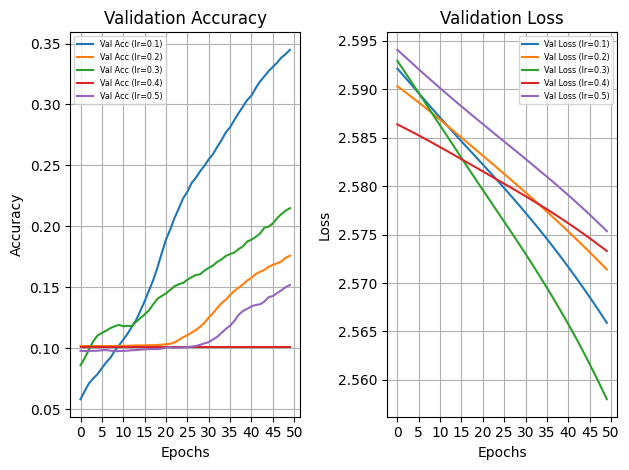

In [ ]:
import matplotlib.pyplot as plt
def plot_metrics(histories, epochs):
    plt.subplot(1, 2, 1)
    for lr, history in histories:
        plt.plot(history.history['val_accuracy'], label=f'Val Acc (lr={lr})')
    plt.title('Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.xticks(range(0, epochs + 1, 5))
    plt.legend(fontsize='xx-small')
    plt.grid()

    plt.subplot(1, 2, 2)
    for lr, history in histories:
        plt.plot(history.history['val_loss'], label=f'Val Loss (lr={lr})')
    plt.title('Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.xticks(range(0, epochs + 1, 5))
    plt.legend(fontsize='xx-small')
    plt.grid()

    plt.tight_layout()
    plt.show()
plot_metrics(histories, epochs)

# different optimizer

This code evaluates the effect of different optimizers on CNN performance by testing each configuration and recording the final epoch’s accuracy and loss. Saving these results to a CSV file enables easy comparison across optimizers, helping to identify the best optimizer for faster convergence and higher accuracy.

In [ ]:
#different optimizer
optimizers = {
    "adam": keras.optimizers.Adam(),
    "sgd": keras.optimizers.SGD(),
    "rmsprop": keras.optimizers.RMSprop(),
    "adagrad": keras.optimizers.Adagrad(),
    "nadam": keras.optimizers.Nadam()
}
histories = []
for opt_name, optimizer in optimizers.items():
    if kernel_initializer_type == "random_normal":
        kernel_initializer = keras.initializers.RandomNormal()
    elif kernel_initializer_type == "glorot_normal":
        kernel_initializer = keras.initializers.GlorotNormal()
    elif kernel_initializer_type == "he_normal":
        kernel_initializer = keras.initializers.HeNormal()
    elif kernel_initializer_type == "glorot_uniform":
        kernel_initializer = keras.initializers.GlorotUniform()
    elif kernel_initializer_type == "he_uniform":
        kernel_initializer = keras.initializers.HeUniform()
    elif kernel_initializer_type == "random_uniform":
        kernel_initializer = keras.initializers.RandomUniform()
    else:
        kernel_initializer = keras.initializers.GlorotUniform()
    kernel_regularizer = keras.regularizers.l2(0.001)
    model = keras.models.Sequential()
    input_shape = (28, 28, 1)
    model.add(layers.Input(shape=input_shape))
    model.add(layers.Conv2D(conv_filters[0], kernel_size, activation=activation, padding="same", strides=strides, kernel_initializer=kernel_initializer))
    model.add(layers.MaxPooling2D(pool_size=pool_size))

    for i in range(1, num_conv_layers):
        model.add(layers.Conv2D(conv_filters[i], kernel_size, activation=activation, padding="same", strides=strides, kernel_initializer=kernel_initializer))
        model.add(layers.MaxPooling2D(pool_size=pool_size))

    model.add(layers.Flatten())
    for _ in range(lay_num):
        model.add(layers.Dropout(dropout_rate))
        model.add(layers.Dense(dense_units, activation=activation, kernel_initializer=kernel_initializer, kernel_regularizer=kernel_regularizer))

    model.add(layers.Dense(10, activation="softmax"))

    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=optimizer,
                  metrics=['accuracy'])

    history = model.fit(train_x, train_y,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=1,
                        validation_data=(val_x, val_y))

    histories.append((opt_name, history))
results = {
    "optimizer": [],
    "epoch": [],
    "accuracy": [],
    "loss": []
}

for opt_name, history in histories:
    final_epoch = len(history.history['accuracy'])
    final_accuracy = history.history['accuracy'][-1]
    final_loss = history.history['loss'][-1]
    results["optimizer"].append(opt_name)
    results["epoch"].append(final_epoch)
    results["accuracy"].append(final_accuracy)
    results["loss"].append(final_loss)

df = pd.DataFrame(results)
csv_file = 'different_optimizers.csv'
if os.path.exists(csv_file):
    df.to_csv(csv_file, mode='a', header=False, index=False)
else:
    df.to_csv(csv_file, mode='w', header=True, index=False)

Epoch 1/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.5760 - loss: 1.0919 - val_accuracy: 0.8515 - val_loss: 0.4565
Epoch 2/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.8410 - loss: 0.4844 - val_accuracy: 0.8758 - val_loss: 0.3760
Epoch 3/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8666 - loss: 0.4170 - val_accuracy: 0.8928 - val_loss: 0.3377
Epoch 4/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8843 - loss: 0.3711 - val_accuracy: 0.8783 - val_loss: 0.3913
Epoch 5/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8942 - loss: 0.3406 - val_accuracy: 0.9073 - val_loss: 0.2937
Epoch 6/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9057 - loss: 0.3117 - val_accuracy: 0.9075 - val_loss: 0.2989
Epoch 7/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9123 - loss: 0.2892 - val_accuracy: 0.9158 - val_loss: 0.2800
Epoch 8/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9176 - loss: 0.2762 

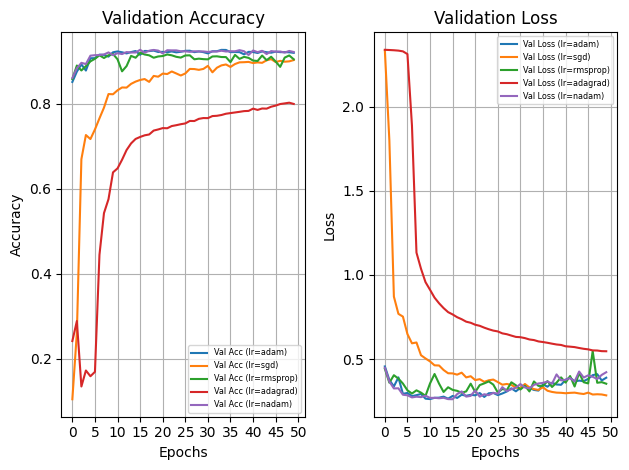

In [ ]:
import matplotlib.pyplot as plt
def plot_metrics(histories, epochs):
    plt.subplot(1, 2, 1)
    for lr, history in histories:
        plt.plot(history.history['val_accuracy'], label=f'Val Acc (lr={lr})')
    plt.title('Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.xticks(range(0, epochs + 1, 5))
    plt.legend(fontsize='xx-small')
    plt.grid()

    plt.subplot(1, 2, 2)
    for lr, history in histories:
        plt.plot(history.history['val_loss'], label=f'Val Loss (lr={lr})')
    plt.title('Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.xticks(range(0, epochs + 1, 5))
    plt.legend(fontsize='xx-small')
    plt.grid()

    plt.tight_layout()
    plt.show()
plot_metrics(histories, epochs)

# different numbers of convolution layers

This code helps to evaluate the impact of varying the number of convolutional layers on CNN performance by testing each configuration and recording the final epoch’s accuracy and loss. Saving these results to a CSV file enables easy comparison and helps to identify the optimal number of convolutional layers for this specific model and dataset.

In [ ]:
#different numbers of convolution layers
epochs = 50
num_conv_layers_list = [1, 2, 3, 4]
histories = []
for num_conv_layers in num_conv_layers_list:
    kernel_initializer = keras.initializers.GlorotUniform()
    kernel_regularizer = keras.regularizers.l2(0.01)

    model = keras.models.Sequential()
    input_shape = (28, 28, 1)

    model.add(layers.Input(shape=input_shape))
    for i in range(num_conv_layers):
        model.add(layers.Conv2D(conv_filters[i], kernel_size, activation=activation, padding="same", strides=strides, kernel_initializer=kernel_initializer))
        model.add(layers.MaxPooling2D(pool_size=2, padding='same'))

    model.add(layers.Flatten())
    for _ in range(lay_num):
        model.add(layers.Dropout(0.5))
        model.add(layers.Dense(dense_units, activation=activation, kernel_initializer=kernel_initializer, kernel_regularizer=kernel_regularizer))

    model.add(layers.Dense(10, activation="softmax"))

    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(learning_rate=learning_rates),  # Fixed learning rate
                  metrics=['accuracy'])
    history = model.fit(train_x, train_y,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=1,
                        validation_data=(val_x, val_y))

    histories.append((num_conv_layers, history))
results = {
    "num_conv_layers": [],
    "epoch": [],
    "accuracy": [],
    "loss": []
}

for num_conv_layers, history in histories:
    final_epoch = len(history.history['accuracy'])
    final_accuracy = history.history['accuracy'][-1]
    final_loss = history.history['loss'][-1]
    results["num_conv_layers"].append(num_conv_layers)
    results["epoch"].append(final_epoch)
    results["accuracy"].append(final_accuracy)
    results["loss"].append(final_loss)
df = pd.DataFrame(results)
csv_file = 'different_conv_layers.csv'
if os.path.exists(csv_file):
    df.to_csv(csv_file, mode='a', header=False, index=False)
else:
    df.to_csv(csv_file, mode='w', header=True, index=False)

Epoch 1/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.0881 - loss: 6.1090 - val_accuracy: 0.0977 - val_loss: 6.0849
Epoch 2/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0946 - loss: 6.0977 - val_accuracy: 0.1215 - val_loss: 6.0727
Epoch 3/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1036 - loss: 6.0867 - val_accuracy: 0.1455 - val_loss: 6.0607
Epoch 4/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1061 - loss: 6.0770 - val_accuracy: 0.1640 - val_loss: 6.0491
Epoch 5/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1111 - loss: 6.0674 - val_accuracy: 0.1852 - val_loss: 6.0378
Epoch 6/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1175 - loss: 6.0575 - val_accuracy: 0.2045 - val_loss: 6.0267
Epoch 7/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1235 - loss: 6.0488 - val_accuracy: 0.2218 - val_loss: 6.0158
Epoch 8/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1252 - loss: 6.0407 - val_accuracy: 0

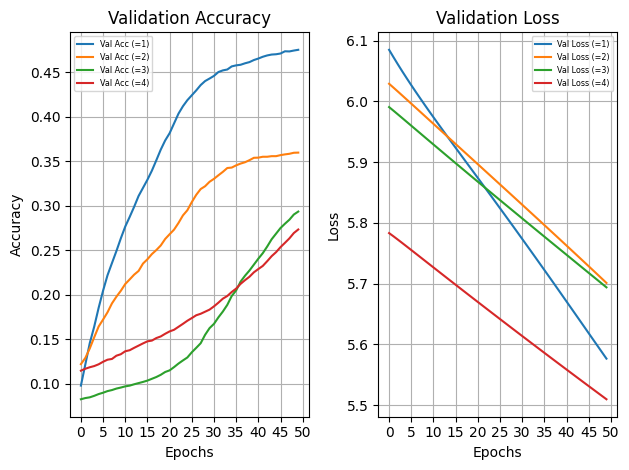

In [ ]:
import matplotlib.pyplot as plt
def plot_metrics(histories, epochs):
    plt.subplot(1, 2, 1)
    for lr, history in histories:
        plt.plot(history.history['val_accuracy'], label=f'Val Acc (={lr})')
    plt.title('Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.xticks(range(0, epochs + 1, 5))
    plt.legend(fontsize='xx-small')
    plt.grid()

    plt.subplot(1, 2, 2)
    for lr, history in histories:
        plt.plot(history.history['val_loss'], label=f'Val Loss (={lr})')
    plt.title('Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.xticks(range(0, epochs + 1, 5))
    plt.legend(fontsize='xx-small')
    plt.grid()

    plt.tight_layout()
    plt.show()
plot_metrics(histories, epochs)

# different stride
This code trains a Convolutional Neural Network (CNN) with different stride values in the convolutional layers to test how varying the stride impacts model performance. Each stride configuration is evaluated, and the results (accuracy and loss from the final epoch) are saved to a CSV file for easy analysis.


In [ ]:
#different stride
strides_list = [1, 2, 3, 4, 5]
histories = []
for stride in strides_list:
    kernel_initializer = keras.initializers.GlorotUniform()
    kernel_regularizer = keras.regularizers.l2(0.01)
    model = keras.models.Sequential()
    input_shape = (28, 28, 1)
    model.add(layers.Input(shape=input_shape))
    model.add(layers.Conv2D(32, kernel_size, activation=activation, padding="same", strides=stride, kernel_initializer=kernel_initializer))
    model.add(layers.MaxPooling2D(pool_size=2, padding='same'))
    model.add(layers.Conv2D(64, kernel_size, activation=activation, padding="same", strides=stride, kernel_initializer=kernel_initializer))
    model.add(layers.MaxPooling2D(pool_size=2, padding='same'))

    model.add(layers.Flatten())
    for _ in range(lay_num):
        model.add(layers.Dropout(0.5))
        model.add(layers.Dense(dense_units, activation=activation, kernel_initializer=kernel_initializer, kernel_regularizer=kernel_regularizer))
    model.add(layers.Dense(10, activation="softmax"))

    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(learning_rate=learning_rates),
                  metrics=['accuracy'])
    history = model.fit(train_x, train_y,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=1,
                        validation_data=(val_x, val_y))
    histories.append((stride, history))
results = {
    "stride": [],
    "epoch": [],
    "accuracy": [],
    "loss": []
}

for stride, history in histories:
    final_epoch = len(history.history['accuracy'])
    final_accuracy = history.history['accuracy'][-1]
    final_loss = history.history['loss'][-1]
    results["stride"].append(stride)
    results["epoch"].append(final_epoch)
    results["accuracy"].append(final_accuracy)
    results["loss"].append(final_loss)

df = pd.DataFrame(results)
csv_file = 'different_strides.csv'
if os.path.exists(csv_file):
    df.to_csv(csv_file, mode='a', header=False, index=False)
else:
    df.to_csv(csv_file, mode='w', header=True, index=False)

Epoch 1/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.1104 - loss: 6.0372 - val_accuracy: 0.1377 - val_loss: 5.9836
Epoch 2/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1245 - loss: 5.9779 - val_accuracy: 0.1722 - val_loss: 5.9216
Epoch 3/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1314 - loss: 5.9187 - val_accuracy: 0.2007 - val_loss: 5.8595
Epoch 4/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1484 - loss: 5.8566 - val_accuracy: 0.2627 - val_loss: 5.7968
Epoch 5/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1596 - loss: 5.7962 - val_accuracy: 0.3165 - val_loss: 5.7329
Epoch 6/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1710 - loss: 5.7372 - val_accuracy: 0.3672 - val_loss: 5.6677
Epoch 7/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1809 - loss: 5.6768 - val_accuracy: 0.4017 - val_loss: 5.6012
Epoch 8/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1984 - loss: 5.6141 - val_accuracy: 0

NameError: name 'pd' is not defined

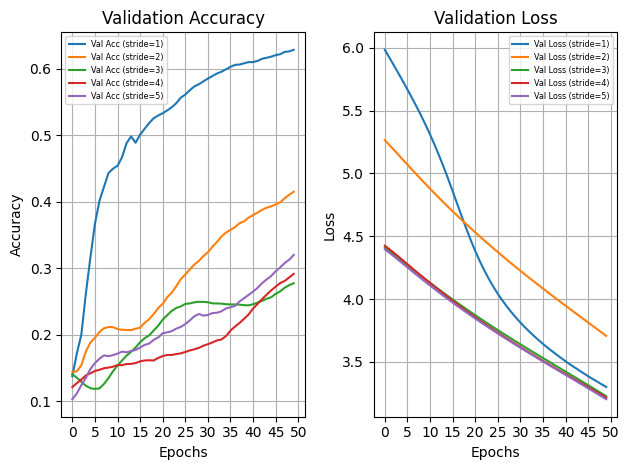

In [ ]:
import matplotlib.pyplot as plt
def plot_metrics(histories, epochs):
    plt.subplot(1, 2, 1)
    for lr, history in histories:
        plt.plot(history.history['val_accuracy'], label=f'Val Acc (stride={lr})')
    plt.title('Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.xticks(range(0, epochs + 1, 5))
    plt.legend(fontsize='xx-small')
    plt.grid()

    plt.subplot(1, 2, 2)
    for lr, history in histories:
        plt.plot(history.history['val_loss'], label=f'Val Loss (stride={lr})')
    plt.title('Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.xticks(range(0, epochs + 1, 5))
    plt.legend(fontsize='xx-small')
    plt.grid()

    plt.tight_layout()
    plt.show()
plot_metrics(histories, epochs)

# different pooling sizes
The goal is to evaluate the impact of varying pooling sizes on the model's performance and to save the final results (accuracy and loss) to a CSV file for easy comparison.


In [ ]:
# Define a list of different pooling sizes to test
pool_sizes = [1, 2, 3, 4, 5, 6]
histories = []
for pool_size in pool_sizes:
    kernel_initializer = keras.initializers.GlorotUniform()
    kernel_regularizer = keras.regularizers.l2(0.01)
    model = keras.models.Sequential()
    input_shape = (28, 28, 1)
    model.add(layers.Input(shape=input_shape))
    model.add(layers.Conv2D(32, kernel_size, activation=activation, padding="same", strides=strides, kernel_initializer=kernel_initializer))
    model.add(layers.MaxPooling2D(pool_size=pool_size, padding='same'))
    model.add(layers.Conv2D(64, kernel_size, activation=activation, padding="same", strides=strides, kernel_initializer=kernel_initializer))
    model.add(layers.MaxPooling2D(pool_size=pool_size, padding='same'))

    model.add(layers.Flatten())
    for _ in range(lay_num):
        model.add(layers.Dropout(0.5))
        model.add(layers.Dense(dense_units, activation=activation, kernel_initializer=kernel_initializer, kernel_regularizer=kernel_regularizer))

    model.add(layers.Dense(10, activation="softmax"))
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(learning_rate=learning_rates),  # Fixed learning rate
                  metrics=['accuracy'])
    history = model.fit(train_x, train_y,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=1,
                        validation_data=(val_x, val_y))

    histories.append((pool_size, history))

results = {
    "pool_size": [],
    "epoch": [],
    "accuracy": [],
    "loss": []
}

for pool_size, history in histories:
    final_epoch = len(history.history['accuracy'])
    final_accuracy = history.history['accuracy'][-1]
    final_loss = history.history['loss'][-1]
    results["pool_size"].append(pool_size)
    results["epoch"].append(final_epoch)
    results["accuracy"].append(final_accuracy)
    results["loss"].append(final_loss)

df = pd.DataFrame(results)
csv_file = 'different_pool_sizes.csv'
if os.path.exists(csv_file):
    df.to_csv(csv_file, mode='a', header=False, index=False)
else:
    df.to_csv(csv_file, mode='w', header=True, index=False)

Epoch 1/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - accuracy: 0.1532 - loss: 6.0861 - val_accuracy: 0.3873 - val_loss: 5.8007
Epoch 2/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.3171 - loss: 5.7845 - val_accuracy: 0.4852 - val_loss: 5.4079
Epoch 3/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4207 - loss: 5.4560 - val_accuracy: 0.6318 - val_loss: 5.0781
Epoch 4/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.4787 - loss: 5.1994 - val_accuracy: 0.6498 - val_loss: 4.8465
Epoch 5/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5238 - loss: 5.0079 - val_accuracy: 0.6560 - val_loss: 4.6845
Epoch 6/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5585 - loss: 4.8671 - val_accuracy: 0.6710 - val_loss: 4.5648
Epoch 7/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.5803 - loss: 4.7485 - val_accuracy: 0.6792 - val_loss: 4.4752
Epoch 8/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.6033 - loss: 4.6546 - val_ac

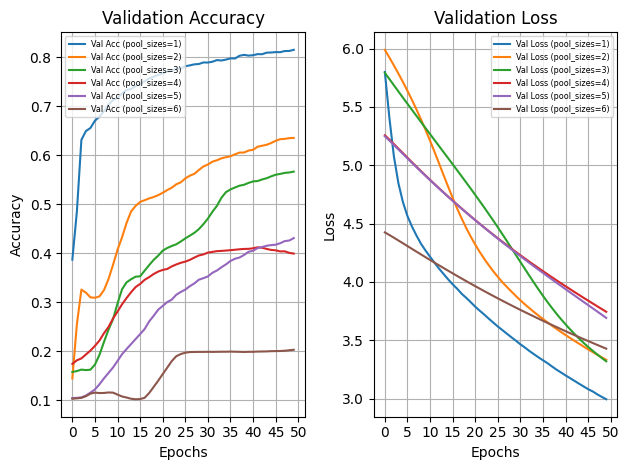

In [ ]:
import matplotlib.pyplot as plt
def plot_metrics(histories, epochs):
    plt.subplot(1, 2, 1)
    for lr, history in histories:
        plt.plot(history.history['val_accuracy'], label=f'Val Acc (pool_sizes={lr})')
    plt.title('Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.xticks(range(0, epochs + 1, 5))
    plt.legend(fontsize='xx-small')
    plt.grid()

    plt.subplot(1, 2, 2)
    for lr, history in histories:
        plt.plot(history.history['val_loss'], label=f'Val Loss (pool_sizes={lr})')
    plt.title('Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.xticks(range(0, epochs + 1, 5))
    plt.legend(fontsize='xx-small')
    plt.grid()

    plt.tight_layout()
    plt.show()
plot_metrics(histories, epochs)

# different kernel sizes

we use different kernel size to train this CNN model. we fix other parameters and focus on which one have high accurancy and low loss function.

In [ ]:
# Define a list of different kernel sizes to test
kernel_sizes = [(1, 1), (3, 3), (5, 5), (7, 7)]
histories = []
for kernel_size in kernel_sizes:
    kernel_initializer = keras.initializers.GlorotUniform()
    kernel_regularizer = keras.regularizers.l2(0.01)
    model = keras.models.Sequential()
    input_shape = (28, 28, 1)
    model.add(layers.Input(shape=input_shape))
    model.add(layers.Conv2D(32, kernel_size, activation=activation, padding="same", strides=strides, kernel_initializer=kernel_initializer))
    model.add(layers.MaxPooling2D(pool_size=2, padding='same'))
    model.add(layers.Conv2D(64, kernel_size, activation=activation, padding="same", strides=strides, kernel_initializer=kernel_initializer))
    model.add(layers.MaxPooling2D(pool_size=2, padding='same'))
    model.add(layers.Flatten())
    for _ in range(lay_num):
        model.add(layers.Dropout(0.5))
        model.add(layers.Dense(dense_units, activation=activation, kernel_initializer=kernel_initializer, kernel_regularizer=kernel_regularizer))
    model.add(layers.Dense(10, activation="softmax"))
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(learning_rate=learning_rates),  # Fixed learning rate
                  metrics=['accuracy'])
    history = model.fit(train_x, train_y,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=1,
                        validation_data=(val_x, val_y))

    histories.append((kernel_size, history))
results = {
    "kernel_size": [],
    "epoch": [],
    "accuracy": [],
    "loss": []
}

for kernel_size, history in histories:
    final_epoch = len(history.history['accuracy'])
    final_accuracy = history.history['accuracy'][-1]
    final_loss = history.history['loss'][-1]
    results["kernel_size"].append(kernel_size)
    results["epoch"].append(final_epoch)
    results["accuracy"].append(final_accuracy)
    results["loss"].append(final_loss)

df = pd.DataFrame(results)
csv_file = 'different_kernel_sizes.csv'
if os.path.exists(csv_file):
    df.to_csv(csv_file, mode='a', header=False, index=False)
else:
    df.to_csv(csv_file, mode='w', header=True, index=False)


Epoch 1/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.1018 - loss: 6.0372 - val_accuracy: 0.1365 - val_loss: 5.9838
Epoch 2/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.1140 - loss: 5.9789 - val_accuracy: 0.1905 - val_loss: 5.9217
Epoch 3/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1304 - loss: 5.9184 - val_accuracy: 0.2263 - val_loss: 5.8594
Epoch 4/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1452 - loss: 5.8593 - val_accuracy: 0.2537 - val_loss: 5.7968
Epoch 5/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1613 - loss: 5.7989 - val_accuracy: 0.2863 - val_loss: 5.7334
Epoch 6/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1763 - loss: 5.7383 - val_accuracy: 0.3120 - val_loss: 5.6696
Epoch 7/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1943 - loss: 5.6790 - val_accuracy: 0.4007 - val_loss: 5.6053
Epoch 8/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2084 - loss: 5.6184 - val_accuracy: 0

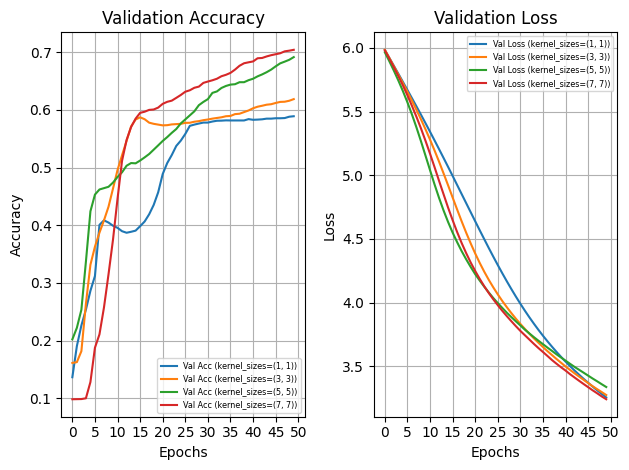

In [ ]:
import matplotlib.pyplot as plt
def plot_metrics(histories, epochs):
    plt.subplot(1, 2, 1)
    for lr, history in histories:
        plt.plot(history.history['val_accuracy'], label=f'Val Acc (kernel_sizes={lr})')
    plt.title('Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.xticks(range(0, epochs + 1, 5))
    plt.legend(fontsize='xx-small')
    plt.grid()

    plt.subplot(1, 2, 2)
    for lr, history in histories:
        plt.plot(history.history['val_loss'], label=f'Val Loss (kernel_sizes={lr})')
    plt.title('Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.xticks(range(0, epochs + 1, 5))
    plt.legend(fontsize='xx-small')
    plt.grid()

    plt.tight_layout()
    plt.show()
plot_metrics(histories, epochs)

# different laynumber

we define the number of dense layer and fix other parameters. Then we loop Through Different Dense Layer Configurations


In [ ]:
lay_nums = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

histories = []
for lay_num in lay_nums:
    kernel_initializer = keras.initializers.GlorotUniform()
    kernel_regularizer = keras.regularizers.l2(0.01)
    model = keras.models.Sequential()
    input_shape = (28, 28, 1)
    model.add(layers.Input(shape=input_shape))
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer=kernel_initializer))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), padding='same'))
    current_shape = (input_shape[0] // 2, input_shape[1] // 2)
    conv_filters = [64, 128, 256]
    for i in range(1, len(conv_filters)):
        model.add(layers.Conv2D(conv_filters[i], (3, 3), activation='relu', padding='same', kernel_initializer=kernel_initializer))
        if current_shape[0] >= 2 and current_shape[1] >= 2:
            model.add(layers.MaxPooling2D(pool_size=(2, 2), padding='same'))
            current_shape = (current_shape[0] // 2, current_shape[1] // 2)
    model.add(layers.Flatten())
    for _ in range(lay_num):
        model.add(layers.Dropout(0.5))
        model.add(layers.Dense(128, activation='relu', kernel_initializer=kernel_initializer, kernel_regularizer=kernel_regularizer))

    model.add(layers.Dense(10, activation="softmax"))
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(learning_rate=0.001),
                  metrics=['accuracy'])

    history = model.fit(train_x, train_y,
                        batch_size=32,
                        epochs=50,
                        verbose=1,
                        validation_data=(val_x, val_y))

    histories.append((lay_num, history))
results = {
    "lay_num": [],
    "epoch": [],
    "accuracy": [],
    "loss": []
}

for lay_num, history in histories:
    final_epoch = len(history.history['accuracy'])
    final_accuracy = history.history['accuracy'][-1]
    final_loss = history.history['loss'][-1]
    results["lay_num"].append(lay_num)
    results["epoch"].append(final_epoch)
    results["accuracy"].append(final_accuracy)
    results["loss"].append(final_loss)

df = pd.DataFrame(results)
csv_file = 'different_lay_num.csv'

if os.path.exists(csv_file):
    df.to_csv(csv_file, mode='a', header=False, index=False)
else:
    df.to_csv(csv_file, mode='w', header=True, index=False)


Epoch 1/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.1364 - loss: 4.7387 - val_accuracy: 0.2900 - val_loss: 4.5847
Epoch 2/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.2663 - loss: 4.5410 - val_accuracy: 0.3897 - val_loss: 4.3553
Epoch 3/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.3634 - loss: 4.3049 - val_accuracy: 0.5135 - val_loss: 4.0371
Epoch 4/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.4526 - loss: 3.9665 - val_accuracy: 0.5515 - val_loss: 3.5990
Epoch 5/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.4984 - loss: 3.5475 - val_accuracy: 0.5898 - val_loss: 3.2268
Epoch 6/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5374 - loss: 3.2372 - val_accuracy: 0.6095 - val_loss: 3.0005
Epoch 7/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5497 - loss: 3.0612 - val_accuracy: 0.6203 - val_loss: 2.8534
Epoch 8/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5750 - loss: 2.919

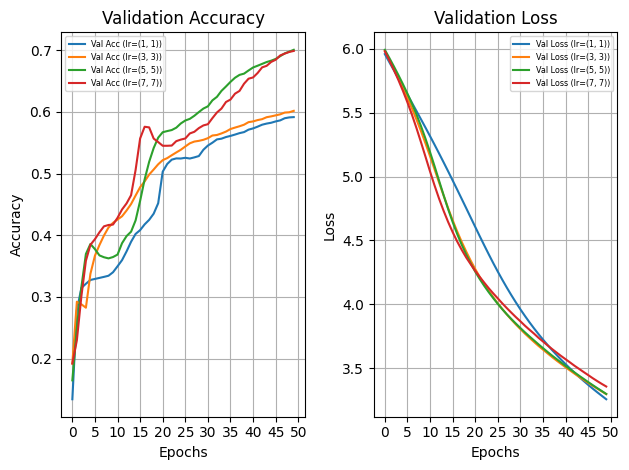

In [ ]:
import matplotlib.pyplot as plt
def plot_metrics(histories, epochs):
    plt.subplot(1, 2, 1)
    for lr, history in histories:
        plt.plot(history.history['val_accuracy'], label=f'Val Acc (lr={lr})')
    plt.title('Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.xticks(range(0, epochs + 1, 5))
    plt.legend(fontsize='xx-small')
    plt.grid()

    plt.subplot(1, 2, 2)
    for lr, history in histories:
        plt.plot(history.history['val_loss'], label=f'Val Loss (lr={lr})')
    plt.title('Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.xticks(range(0, epochs + 1, 5))
    plt.legend(fontsize='xx-small')
    plt.grid()

    plt.tight_layout()
    plt.show()
plot_metrics(histories, epochs)